In [234]:
from sklearn.preprocessing import MinMaxScaler # for scaling input features 
import numpy as np # for numerical analysis (algebraic)
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<h3> Min Max scaling <\h3>

In [235]:
#  Train Data
input_train_data = np.array([[0, 1, 0],
                           [0, 1, 1], 
                           [0, 0, 0],
                           [10, 0, 0], 
                           [10, 1, 1], 
                           [10, 0, 1]])

out_train_data = np.array([[0],
                           [0], 
                           [0], 
                           [1], 
                           [1], 
                           [1]])

input_data_prediction = np.array([1, 1, 0])



#  Test Data

input_test_data = np.array([[1, 1, 1],
                           [10, 0, 1], 
                           [0, 1, 10],
                           [10, 1, 10], 
                           [0, 0, 0], 
                           [0, 1, 1]])

out_test_data = np.array([[0],
                          [0], 
                          [0], 
                          [1], 
                          [1],
                          [1]])

<h3> Scaling </h3>

In [236]:
scaller = MinMaxScaler()

In [237]:
input_train_data_scaled = scaller.fit_transform(input_train_data)
input_test_data_scaled = scaller.fit_transform(input_test_data)

output_train_data_scaled = scaller.fit_transform(out_train_data)
output_test_data_scaled = scaller.fit_transform(out_test_data)

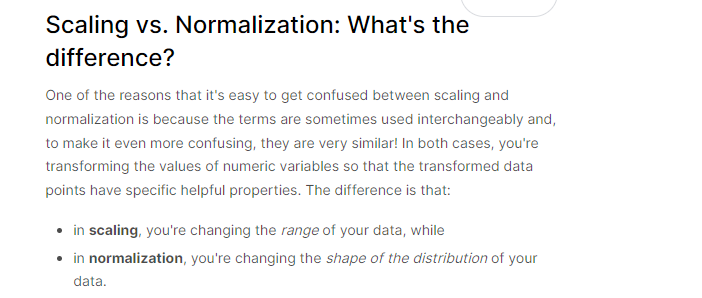

https://www.kaggle.com/code/alexisbcook/scaling-and-normalization

In [238]:
print("Input TrainScalled Data: ", input_train_data_scaled)
print("\n Input Test Scalled Data: ", input_test_data_scaled )

print("\n Output Train Scalled Data: ", output_train_data_scaled)
print("\nOutput test Scalled Data: ", output_test_data_scaled)

Input TrainScalled Data:  [[0. 1. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 0. 1.]]

 Input Test Scalled Data:  [[0.1 1.  0.1]
 [1.  0.  0.1]
 [0.  1.  1. ]
 [1.  1.  1. ]
 [0.  0.  0. ]
 [0.  1.  0.1]]

 Output Train Scalled Data:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]

Output test Scalled Data:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


<h3> Saving the scaled data in kaggle folder </h3>

In [239]:
os.makedirs('/kaggle/working/SavedData')

FileExistsError: [Errno 17] File exists: '/kaggle/working/SavedData'

In [ ]:
np.save("SavedData/input_train_data_scaled.npy", input_train_data_scaled)
np.save("SavedData/input_test_data_scaled.npy",input_test_data_scaled)
np.save("SavedData/input_data_prediction.npy",input_data_prediction)

np.save("SavedData/out_train_data_scaled.npy", output_train_data_scaled)
np.save("SavedData/out_test_data_scaled.npy", output_test_data_scaled)

In [240]:
 # we use self for accesing local variable, self is not parameter
class Neuralnetwork():
    
    def __init__(self):  # __init__ is default contructor
        
        self.inputSize = 3
        self.hiddenSize = 3
        self.outputSize = 1
        
        
         # creating weigts for the layers
            
        self.W1 = np.random.rand(self.inputSize, self.hiddenSize) # generate weight of random no. from range of input size to hidden layer size
        self.W2 = np.random.rand(self.hiddenSize, self.outputSize)
        self.limit = 0.5     # threshold limitation
        
        
        #creating confusion matrix 
        
        self.error_list = []
        
        self.true_positives = 0
        self.true_negatives = 0
        self.false_positives = 0
        self.false_negatives = 0
        
        
        #forward propagation
        
    def forward(self, X):   # X is the input feature , weight tranform layer
        self.z = np.matmul(X, self.W1)
        self.z2 = self.sigmoid(self.z)    # sigmoid to convert thelue of z1 from range 0 to 1
        self.z3 = np.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3)         # activation function step
        return o
        
        
    def sigmoid(self, s):
        return 1 / (1+ np.exp(-s))
        
    
    def sigmoidPrime(self, s):
        return s*(1-s)   # for not missing any negative value while applying sigmoid activation function 
    
    
    # backward propagation
    
    def backward(self, X, y, o):      # y is test data value , o is output data
        self.o_error = y - o           # calculating error by subtracting test and output
        self.o_delta = self.o_error *  self.sigmoidPrime(o)     # neg * neg = all positive , one is actual error and the other one is predicted error
        
        
        self.z2_error = np.matmul(self.o_delta, np.matrix.transpose(self.W2)) # backwarding error value
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2_error)      # for updating particular edges bbetween the layer
        
        self.W1 += np.matmul(np.matrix.transpose(X),self.z2_delta)            # updating weights ; here input to hidden layer
        self.W2 += np.matmul(np.matrix.transpose(self.z), self.o_delta)     # for weight 2 we uses output delta , analysis between hidden and output layer before entering output layer
    
        
        
    def train(self, X, y, epochs):   # calling the function of the class in the training phase of network
        for epoch in range(epochs):
            o = self.forward(X)      # calling forward propagation for input features
            self.backward(X, y, o)   # calling backward propagation for input , test value and output data
            self.error_list.append(np.abs(self.o_error).mean()) # appending the error value by calculating (self.o_error = y - o ) and take absolute value to omit the negative error and append into error list
        
            
            
    def predict(self, x_test_data):
        return self.forward(x_test_data).item()     # item to extract each feature
        
    
    def error_visualization(self):
        
        plt.plot(range(len(self.error_list)), self.error_list)  # range(len(error_list))= index no. ;  self.error_list = actual error value
        plt.title("Error Visulatization")
        plt.xlabel("epochs")
        plt.ylabel("Loss Value")
        
        
        
    def evaluate(self, input_Data, output_Data):
        for i , testingEvaluation in enumerate(input_Data):
            
            if self.predict(testingEvaluation) > self.limit and output_Data[i] == 1:
                self.true_positives +=1
            if self.predict(testingEvaluation) < self.limit and output_Data[i] == 1:
                self.true_negatives +=1
            if self.predict(testingEvaluation) > self.limit and output_Data[i] == 0:
                self.false_positives += 1
            if self.predict(testingEvaluation) < self.limit and output_Data[i] == 0:
                self.false_negatives +=1
                
                
        print("True Positive Values:", self.true_positives)
        print("True negatives Values:", self.true_negatives)
        print("False Positive Values:", self.false_positives)
        print("False negatives Values", self.false_negatives)
        
        
    

<h3> Loading Data </h3>

In [241]:
train_scalled_data = np.load("SavedData/input_train_data_scaled.npy")
train_test_scalled_data = np.load("SavedData/input_test_data_scaled.npy")
prediction_scalled_data = np.load("SavedData/input_data_prediction.npy")

output_scalled_data = np.load("SavedData/out_train_data_scaled.npy")
output_test_scalled_data = np.load("SavedData/out_test_data_scaled.npy")

True Positive Values: 3
True negatives Values: 0
False Positive Values: 3
False negatives Values 0


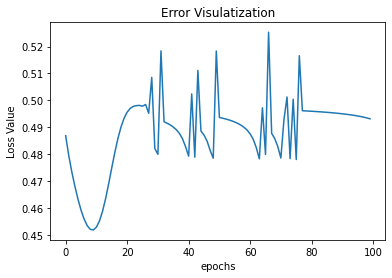

In [242]:
# calling class
Network = Neuralnetwork()
Network.train(input_train_data_scaled, output_scalled_data, 100) # calling train function with parameter
Network.predict(prediction_scalled_data)       # calling predict function with parameter
Network.error_visualization()            # calling error function for visualization
Network.evaluate(input_test_data_scaled, out_test_data_scaled) # calling  function for CM

<h2> New Architecture ( Fully Connected NN)

In [243]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  # for implementing Feed Forward NN we need Dense layer only


In [244]:
# creating datasets

trainingData = np.array([[0, 0],
                         [0, 1],
                         [1, 0],
                         [1, 1]], 'float32')  # defining data type by float32
TestingData = np.array([[0], 
                        [1], 
                        [1], 
                        [0]], 'float32')

In [245]:
trainingData.shape

(4, 2)

In [246]:
TestingData.shape

(4, 1)

In [247]:
model = Sequential()  # Sequential() meqan to create space in model and add layers one by one and it will be FIFO. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

model.add(Dense(32, input_dim = 2, activation = 'relu')) # input node = 32 , training data dimension = 2 , for continous value activation = relu
model.add(Dense(1, activation = 'sigmoid'))              # hidden layer in Dense, input node = 1 / either result 0 or 1 , activation sigmoid = with the addition of just one hidden layer and a sigmoid activation function in the hidden layer, the neural network can easily learn a non-linearly separable problem. Using a non-linear function produces non-linear boundaries and hence, the sigmoid function can be used in neural networks for learning complex decision functions.



In [248]:
# compile configures the model for training.

model.compile(loss = 'mean_squared_error', # loss mean square error because we used activation function sigmoid. It is a regression loss function which computes the mean of squares of errors between labels and predictions.
            optimizer = 'adam',
            metrics = ['binary_accuracy'])  # binary accuracy because activation sigmoid (0 or 1). Calculates how often predictions match binary labels.

In [249]:
model.fit(trainingData, TestingData, epochs = 50)


Epoch 1/50
1/1 [==============================] - 0s 378ms/step - loss: 0.2504 - binary_accuracy: 0.7500
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2498 - binary_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2493 - binary_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2487 - binary_accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.2481 - binary_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2475 - binary_accuracy: 0.7500
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2470 - binary_accuracy: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2464 - binary_accuracy: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 0.2459 - binary_accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 

In [250]:
result = model.evaluate(trainingData, TestingData)

1/1 [==============================] - 0s 137ms/step - loss: 0.2257 - binary_accuracy: 1.0000


In [251]:
model.predict(trainingData.round())  # getting the accuracy for the testing data = 0 ,1 ,1, 0

array([[0.48681846],
       [0.5244007 ],
       [0.5572324 ],
       [0.4937085 ]], dtype=float32)